Clase 5
====

Objetivo:

* Introducción a cobrapy

La documentación oficial de cobra se encuentra disponible [aquí](http://cobrapy.readthedocs.io/en/0.4.0/getting_started.html). Hoy veremos los comandos escenciales de cobra y construiremos nuestra propia red metábolica.

Comandos básicos
--------------

Comezaremos cargado cobra y determinando que version está instalada (esto es útil para consultar la documentación adecuada; diferentes versiones de cobra tienen diferentes documentaciones)

In [6]:
import cobra
cobra.__version__

'0.8.2'

A modo de ejemplo importaremos la red metabólica de Escherichia coli

In [5]:
import cobra.test

# "ecoli" and "salmonella" are also valid arguments
model = cobra.test.create_test_model("ecoli")

Veamos cuantas reacciones y metabolitos tiene "ecoli"

In [3]:
print(len(model.reactions))
print(len(model.metabolites))

2583
1805


Podemos inspeccionar reacciones individualmente. Por ejemplo, para ver la reacción 30:

In [7]:
print model.reactions[29]

EX_5dglcn_e: 5dglcn_e --> 


Ver las primeras 10 reacciones:

In [10]:
for i in range(10):
    print model.reactions[i], model.reactions[i].reaction

 DM_4CRSOL: 4crsol_c -->  4crsol_c --> 
DM_5DRIB: 5drib_c -->  5drib_c --> 
DM_AACALD: aacald_c -->  aacald_c --> 
DM_AMOB: amob_c -->  amob_c --> 
DM_MTHTHF: mththf_c -->  mththf_c --> 
DM_OXAM: oxam_c -->  oxam_c --> 
Ec_biomass_iJO1366_WT_53p95M: 0.000223 10fthf_c + 0.000223 2dmmql8_c + 2.5e-05 2fe2s_c + 0.000248 4fe4s_c + 0.000223 5mthf_c + 0.000279 accoa_c + 0.000223 adocbl_c + 0.499149 ala__L_c + 0.000223 amet_c + 0.28742 arg__L_c + 0.234232 asn__L_c + 0.234232 asp__L_c + 54.119975 atp_c + 0.000116 bmocogdp_c + 2e-06 btn_c + 0.004952 ca2_c + 0.000223 chor_c + 0.004952 cl_c + 0.002944 clpn160_p + 0.00229 clpn161_p + 0.00118 clpn181_p + 0.000168 coa_c + 2.4e-05 cobalt2_c + 0.008151 colipa_e + 0.129799 ctp_c + 0.000674 cu2_c + 0.088988 cys__L_c + 0.024805 datp_c + 0.025612 dctp_c + 0.025612 dgtp_c + 0.024805 dttp_c + 0.000223 enter_c + 0.000223 fad_c + 0.006388 fe2_c + 0.007428 fe3_c + 0.255712 gln__L_c + 0.255712 glu__L_c + 0.595297 gly_c + 0.154187 glycogen_c + 0.000223 gthrd_c + 

También podemos identificar una reacción por su nombre:

In [20]:
pgi = model.reactions.get_by_id("PGI")
print pgi
print pgi.reaction
print pgi.name


print(pgi.lower_bound, "< pgi <", pgi.upper_bound)

PGI: g6p_c <=> f6p_c
g6p_c <=> f6p_c
glucose-6-phosphate isomerase
(-1000.0, '< pgi <', 1000.0)


Podemos verificar el balance de masa de una reacción:

In [28]:
# Balance de masa original
print(pgi.check_mass_balance())

# Veamos que pasa con el balance de masa si ahora agregamos un metabolito a la reacción
pgi.add_metabolites({model.metabolites.get_by_id("h_c"): -1})
pgi.reaction
print(pgi.check_mass_balance())

{'H': -6.0, 'charge': -6.0}
{'H': -7.0, 'charge': -7.0}


Tambien podemos ver cuales son las reacciones en las que un determinado metabólito está involucrado:

In [22]:
for rxn in model.metabolites.get_by_id("atp_c").reactions:
    print rxn, rxn.reaction

PGP120abcpp: atp_c + h2o_c + pgp120_c --> adp_c + h_c + pgp120_p + pi_c atp_c + h2o_c + pgp120_c --> adp_c + h_c + pgp120_p + pi_c
DTMPK: atp_c + dtmp_c <=> adp_c + dtdp_c atp_c + dtmp_c <=> adp_c + dtdp_c
PPKr: atp_c + pi_c <=> adp_c + ppi_c atp_c + pi_c <=> adp_c + ppi_c
PGP141abcpp: atp_c + h2o_c + pgp141_c --> adp_c + h_c + pgp141_p + pi_c atp_c + h2o_c + pgp141_c --> adp_c + h_c + pgp141_p + pi_c
MOBDabcpp: atp_c + h2o_c + mobd_p --> adp_c + h_c + mobd_c + pi_c atp_c + h2o_c + mobd_p --> adp_c + h_c + mobd_c + pi_c
PGP160abcpp: atp_c + h2o_c + pgp160_c --> adp_c + h_c + pgp160_p + pi_c atp_c + h2o_c + pgp160_c --> adp_c + h_c + pgp160_p + pi_c
OPHHX3: 2oph_c + 2.0 atp_c + 3.0 h2o_c + nad_c --> 2ohph_c + 2.0 adp_c + 3.0 h_c + nadh_c + 2.0 pi_c 2oph_c + 2.0 atp_c + 3.0 h2o_c + nad_c --> 2ohph_c + 2.0 adp_c + 3.0 h_c + nadh_c + 2.0 pi_c
GLYK: atp_c + glyc_c --> adp_c + glyc3p_c + h_c atp_c + glyc_c --> adp_c + glyc3p_c + h_c
NDPK3: atp_c + cdp_c <=> adp_c + ctp_c atp_c + cdp_c <=> ad

FACOAL100t2pp: atp_c + coa_c + dca_p + h_p --> amp_c + dcacoa_c + h_c + ppi_c atp_c + coa_c + dca_p + h_p --> amp_c + dcacoa_c + h_c + ppi_c
PYDXK: atp_c + pydx_c --> adp_c + h_c + pydx5p_c atp_c + pydx_c --> adp_c + h_c + pydx5p_c
PACCOAL: atp_c + coa_c + pac_c --> amp_c + phaccoa_c + ppi_c atp_c + coa_c + pac_c --> amp_c + phaccoa_c + ppi_c
PYDXNK: atp_c + pydxn_c --> adp_c + h_c + pdx5p_c atp_c + pydxn_c --> adp_c + h_c + pdx5p_c
RNTR1c2: atp_c + 2.0 flxr_c + 2.0 h_c --> datp_c + 2.0 flxso_c + h2o_c atp_c + 2.0 flxr_c + 2.0 h_c --> datp_c + 2.0 flxso_c + h2o_c
2AGPEAT120: 2agpe120_c + atp_c + ddca_c --> amp_c + pe120_c + ppi_c 2agpe120_c + atp_c + ddca_c --> amp_c + pe120_c + ppi_c
PPK2r: atp_c + ppi_c <=> adp_c + pppi_c atp_c + ppi_c <=> adp_c + pppi_c
2AGPEAT140: 2agpe140_c + atp_c + ttdca_c --> amp_c + pe140_c + ppi_c 2agpe140_c + atp_c + ttdca_c --> amp_c + pe140_c + ppi_c
MG2uabcpp: atp_c + h2o_c + mg2_p --> adp_c + h_c + mg2_c + pi_c atp_c + h2o_c + mg2_p --> adp_c + h_c + mg2

Simulación de flujos metabólicos
================================

Para simular los flujos metabólicos optimizacmos los flujos de la red metabólica:

In [41]:
solution = model.optimize() #solution=model.otimize()
print (solution)

<Solution 1.384 at 0x1075e5f8>


Los resultados se pueder revisar:

In [44]:
print (solution.status)   # print solution.status
print (solution.f)       # print solution.f
print model.summary()   # print model.sumary()

optimal
1.38406601155
IN FLUXES              OUT FLUXES           OBJECTIVES
---------------------  -------------------  ---------------------
h_e        871         h2o_e     39.7       Ec_biomass_i...  1.38
nh4_e       14.9       co2_e      3.19
glc__D_e    10         mththf_c   0.00062
pi_e         1.34      5drib_c    0.000311
so4_e        0.349     4crsol_c   0.000309
k_e          0.27      amob_c     2.77e-06
o2_e         0.23      meoh_e     2.77e-06
mg2_e        0.012
fe2_e        0.0114
fe3_e        0.0108
ca2_e        0.0072
cl_e         0.0072
cu2_e        0.000981
mn2_e        0.000956
zn2_e        0.000472
ni2_e        0.000447
mobd_e       0.000179
cobalt2_e    3.46e-05
None


Para inspeccionar como la función objetivo (en este caso:"Ec_biomass_iJO1366_core_53p95M")

In [45]:
biomass = model.reactions.get_by_id("Ec_biomass_iJO1366_core_53p95M")
print biomass.reaction


0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 2ohph_c + 0.00026 4fe4s_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 54.124831 atp_c + 0.000122 bmocogdp_c + 2e-06 btn_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 2.5e-05 cobalt2_c + 0.133508 ctp_c + 0.000709 cu2_c + 0.09158 cys__L_c + 0.026166 datp_c + 0.027017 dctp_c + 0.027017 dgtp_c + 0.026166 dttp_c + 0.000223 fad_c + 0.006715 fe2_c + 0.007808 fe3_c + 0.26316 gln__L_c + 0.26316 glu__L_c + 0.612638 gly_c + 0.215096 gtp_c + 48.601527 h2o_c + 0.094738 his__L_c + 0.290529 ile__L_c + 0.195193 k_c + 0.019456 kdo2lipid4_e + 0.450531 leu__L_c + 0.343161 lys__L_c + 0.153686 met__L_c + 0.008675 mg2_c + 0.000223 mlthf_c + 0.000691 mn2_c + 7e-06 mobd_c + 0.013894 murein5px4p_p + 0.001831 nad_c + 0.000447 nadp_c + 0.013013 nh4_c + 0.000323 ni2_c + 0.017868 pe160_c + 0.045946 pe160_p + 0.054154 pe161_c + 0.02106 pe161_p + 0.185265 phe__L_c + 0.000223 pheme_c + 0.221055 pro__L_c + 0.

Planos de fase
--------------

Los planos de fase son útiles cuando se quiere evaluar como cambios en las variables (tipicamente flujos de entrada) afectan el valor de la función objetivo (tipicamente producción de biomasa).

Veamos una representación gráfica usando otra red de ejemplo (llamada model2):

C:\Users\Ivan\Anaconda2\lib\site-packages\matplotlib\figure.py:1743 UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


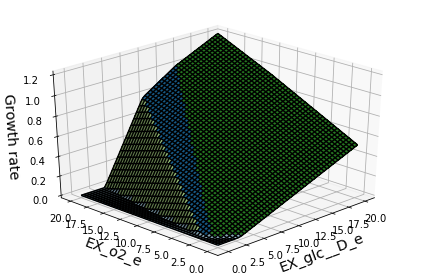

In [46]:
%matplotlib inline
from time import time

from cobra.flux_analysis import calculate_phenotype_phase_plane

model2 = cobra.test.create_test_model("textbook")
data = calculate_phenotype_phase_plane(model2, "EX_glc__D_e", "EX_o2_e")
data.plot_matplotlib();

Ejercicio
---------

* Realizar este gráfico para la red de ecoli variando el consumo de glucosa y oxigeno.

Nota: deberas identificar las reacciones asociados al consumo de glucosa y oxigeno (pista: usa el comando `model.summary()` ).

GLCtexi: glc__D_e --> glc__D_p glc__D_e --> glc__D_p
EX_glc_e: glc__D_e <=>  glc__D_e <=> 
GLCtex: glc__D_e <=> glc__D_p glc__D_e <=> glc__D_p
O2tex: o2_e <=> o2_p o2_e <=> o2_p
EX_o2_e: o2_e <=>  o2_e <=> 


cobra\flux_analysis\phenotype_phase_plane.py:95 UserWarning: not enough colors to color all detected phases


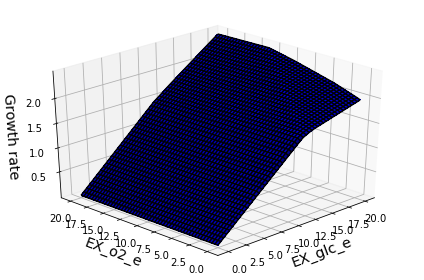

In [52]:
# buecando las reacciones para glucosa y oxigeno en ecoli
for rxn in model.metabolites.get_by_id("glc__D_e").reactions:
    print rxn, rxn.reaction
    
for rxn in model.metabolites.get_by_id("o2_e").reactions:
    print rxn, rxn.reaction



%matplotlib inline
from time import time

from cobra.flux_analysis import calculate_phenotype_phase_plane

model2 = cobra.test.create_test_model("ecoli") # en ecoli
data = calculate_phenotype_phase_plane(model, "EX_glc_e", "EX_o2_e") #nombre de reacciones de glucosa y oxigeno
data.plot_matplotlib();

Building a model
=========

Ahora construiremos nuestra propia red metaolica usando como ejemplo la red metanogénica que vimos en la clase pasada:

![Image](https://raw.githubusercontent.com/modcommet/Clases/master/metanogenesis.png)

In [55]:
from cobra import Model, Reaction, Metabolite
cobra_model = Model('primordialMetabolism')

# Ractions
E1 = Reaction('E1')
E1.name = 'Exchange reaction of CO2'
E1.subsystem = 'Entrance' #nombre de ruta metabolica
E1.lower_bound = 10.  # This is the default sustrato limitante
E1.upper_bound = 1000.  # This is the default
#E1.objective_coefficient = 0. # this is the default

E2 = Reaction('E2')
E2.name = 'Exchange reaction of H2'
E2.subsystem = 'Entrance'
E2.lower_bound = 0.  # This is the default
E2.upper_bound = 1000.  # This is the default
#E2.objective_coefficient = 0. # this is the default

# Agrega el resto de las reacciones

E3 = Reaction ('E3')
E3.name = 'Exchange reaction of CH4'
E3.subsystem = 'Exit'
E3.lower_bound = 0.  # This is the default
E3.upper_bound = 1000.  # This is the default
#E3.objective_coefficient = 0. # this is the default

E4 = Reaction ('E4')
E4.name = 'Exchange reaction of F420'
E4.subsystem = 'Exit'
E4.lower_bound = 0.  # This is the default
E4.upper_bound = 1000.  # This is the default
#E4.objective_coefficient = 1. # this is the default función objetivo

E5 = Reaction ('E5')
E5.name = 'Exchange reaction of H20'
E5.subsystem = 'Exit'
E5.lower_bound = 0.  # This is the default
E5.upper_bound = 1000.  # This is the default
#E5.objective_coefficient = 0. # this is the default función objetivo


R1 = Reaction ('R1')
R1.name = 'Second reaction'
R1.subsystem = ''
R1.lower_bound = 0.  # This is the default
R1.upper_bound = 1000.  # This is the default
#R1.objective_coefficient = 0. # this is the default

R3 = Reaction ('R3')
R3.name = 'Second reaction'
R3.subsystem = ''
R3.lower_bound = 0.  # This is the default
R3.upper_bound = 1000.  # This is the default
#R3.objective_coefficient = 0. # this is the default



# Metabolites
CO2 = Metabolite('CO2', formula='CO2',name='carbon dioxide',compartment='c') # e por externo, c por citoplasma
H2 = Metabolite('H2', formula='H2',name='H2',compartment='c')
CH4 = Metabolite('CH4', formula='CH4',name='CH4',compartment='c')
F420 = Metabolite('F420', formula='F420',name='F420',compartment='c')
I1 = Metabolite('I1', formula='I1',name='I1',compartment='c')
H2O = Metabolite('H2O', formula='H2O',name='H2O',compartment='c')


# Agrega el resto de los metabolitos

# Adding metabolites to reaction
E1.add_metabolites({CO2: 1.0}) # signo positivo implca que esta a la derecha de la reacción
E2.add_metabolites({H2: 2.0})
E3.add_metabolites({CH4: -1.0})
R1.add_metabolites({H2: -2.0, CO2: -1.0, F420: -1.0, I1: 1.0})
R2.add_metabolites({H2: -2.0, CO2: -1.0, F420: -1.0, I1: 1.0})

# ya sabes que hacer :P

# Add reactin to model
cobra_model.add_reaction(E1)
cobra_model.add_reaction(E2)
cobra_model.add_reaction(E3)
cobra_model.add_reaction(E4)
cobra_model.add_reaction(E5)
cobra_model.add_reaction(R1)
cobra_model.add_reaction(R2)
cobra_model.add_reaction(R3)

# lo mismo aquí
cobra_model.objetive = 'E4'

NameError: name 'R1' is not defined

Puedes revisar tu modelo con los siguientes comandos

In [ ]:
# Iterate through the the objects in the model
print("Reactions")
print("---------")
for x in cobra_model.reactions:
    print("%s : %s" % (x.id, x.reaction))
print("Metabolites")
print("-----------")
for x in cobra_model.metabolites:
    print('%s : %s' % (x.id, x.formula))

Ejercicio
---------

* Simula los flujos de esta red metabólica.
    